### Problem Statement:

###### Avocado is a fruit consumed by people heavily in the United States. 

### Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [92]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [115]:
# Inporting the data

df = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\Eve\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [116]:
#Removing column 'A'becose there is no any use this.
df = df.drop(columns=["Unnamed: 0"],axis=1)

In [117]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


### Features
Date: The date of selling avacado

Total Volume: Total number of avacado's sold

4046 : Total avacados of type PSU_4046 sold

4225 : Total avacados of type PSU_4225 sold

4770 : Total avacados of type PSU_4770 sold

Total Bags: Total number of bags

Small Bags: Total number of small bags

Large Bags: Total number of Large Bags

XLarge Bags: Total nnumber of Xtra large Bags

Type : Type of avacado - Conventional/ Organic

year: year

region: region

### Label/Response/Target    

AveragePrice: Average price of an avacado.

### Exploratory Data Analysis(EDA)

#### Data Inspection

In [118]:
df.shape

(18249, 13)

In the Dataset 18249 Rows and 13 Columns

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In the dataset 10 float and 3 object columns..

In [120]:
#### Checking missing values.

df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no any missing value in my dataset

In [121]:
# Statiscal summary
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Total Volume & Total Bags are just the total of 4046, 4225, 4770 & Small/Large/XLarge Bags will calculate the percentage of these columns and drop the individual columns

In [122]:
df["4046_perc"] = df["4046"]/df["Total Volume"]*100
df["4225_perc"] = df["4225"]/df["Total Volume"]*100
df["4770_perc"] = df["4770"]/df["Total Volume"]*100
df["Small_Bags_perc"] = df["Small Bags"]/df["Total Bags"]*100
df["Large_Bags_perc"] = df["Large Bags"]/df["Total Bags"]*100
df["XLarge_Bags_perc"] = df["XLarge Bags"]/df["Total Bags"]*100

df = df.drop(df[["4046","4225","4770","Small Bags","Large Bags","XLarge Bags"]],axis=1)
df.head()

,Date,AveragePrice,Total Volume,Total Bags,type,year,region,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,XLarge_Bags_perc
0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany,1.613939,84.772284,0.074973,98.927775,1.072225,0.0
1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany,1.228712,81.343416,0.106292,98.974390,1.025610,0.0
2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany,0.672220,92.327412,0.110387,98.733756,1.266244,0.0
3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany,1.433054,91.118434,0.091883,97.698222,2.301778,0.0
4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany,1.844607,85.890936,0.148473,96.803176,3.196824,0.0


In [123]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

#### Changing the date value from text to 'Date'type

In [124]:
import datetime as dt
print(df.head())
df["Date"] = pd.to_datetime(df["Date"])
df['Date'] = df["Date"].map(dt.datetime.toordinal)
df.head()

         Date  AveragePrice  Total Volume  Total Bags          type  year  \
0  2015-12-27          1.33      64236.62     8696.87  conventional  2015   
1  2015-12-20          1.35      54876.98     9505.56  conventional  2015   
2  2015-12-13          0.93     118220.22     8145.35  conventional  2015   
3  2015-12-06          1.08      78992.15     5811.16  conventional  2015   
4  2015-11-29          1.28      51039.60     6183.95  conventional  2015   

   region  4046_perc  4225_perc  4770_perc  Small_Bags_perc  Large_Bags_perc  \
0  Albany   1.613939  84.772284   0.074973        98.927775         1.072225   
1  Albany   1.228712  81.343416   0.106292        98.974390         1.025610   
2  Albany   0.672220  92.327412   0.110387        98.733756         1.266244   
3  Albany   1.433054  91.118434   0.091883        97.698222         2.301778   
4  Albany   1.844607  85.890936   0.148473        96.803176         3.196824   

   XLarge_Bags_perc  
0               0.0  
1           

,Date,AveragePrice,Total Volume,Total Bags,type,year,region,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,XLarge_Bags_perc
0,735959,1.33,64236.62,8696.87,conventional,2015,Albany,1.613939,84.772284,0.074973,98.927775,1.072225,0.0
1,735952,1.35,54876.98,9505.56,conventional,2015,Albany,1.228712,81.343416,0.106292,98.974390,1.025610,0.0
2,735945,0.93,118220.22,8145.35,conventional,2015,Albany,0.672220,92.327412,0.110387,98.733756,1.266244,0.0
3,735938,1.08,78992.15,5811.16,conventional,2015,Albany,1.433054,91.118434,0.091883,97.698222,2.301778,0.0
4,735931,1.28,51039.60,6183.95,conventional,2015,Albany,1.844607,85.890936,0.148473,96.803176,3.196824,0.0


#### Encoding columns region and type columns.

In [127]:
df = pd.get_dummies(df, columns=["region","type"],drop_first=True)
df.head()

,Date,AveragePrice,Total Volume,Total Bags,year,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
0,735959,1.33,64236.62,8696.87,2015,1.613939,84.772284,0.074973,98.927775,1.072225,...,0,0,0,0,0,0,0,0,0,0
1,735952,1.35,54876.98,9505.56,2015,1.228712,81.343416,0.106292,98.974390,1.025610,...,0,0,0,0,0,0,0,0,0,0
2,735945,0.93,118220.22,8145.35,2015,0.672220,92.327412,0.110387,98.733756,1.266244,...,0,0,0,0,0,0,0,0,0,0
3,735938,1.08,78992.15,5811.16,2015,1.433054,91.118434,0.091883,97.698222,2.301778,...,0,0,0,0,0,0,0,0,0,0
4,735931,1.28,51039.60,6183.95,2015,1.844607,85.890936,0.148473,96.803176,3.196824,...,0,0,0,0,0,0,0,0,0,0


In [128]:
df.describe()

,Date,AveragePrice,Total Volume,Total Bags,year,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18234.000000,18234.000000,...,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,736189.979670,1.405978,8.506440e+05,2.396392e+05,2016.147899,22.518530,34.739116,1.931306,74.993522,24.251994,...,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018357,0.499918
std,341.513465,0.402677,3.453545e+06,9.862424e+05,0.939938,21.392117,23.491216,4.186621,28.498033,28.541751,...,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134243,0.500014
min,735602.000000,0.440000,8.456000e+01,0.000000e+00,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,735896.000000,1.100000,1.083858e+04,5.088640e+03,2015.000000,3.277896,15.727854,0.000000,58.363435,0.944600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,736190.000000,1.370000,1.073768e+05,3.974383e+04,2016.000000,15.783734,31.686212,0.151577,87.175544,11.633810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,736484.000000,1.660000,4.329623e+05,1.107834e+05,2017.000000,37.873742,51.717479,1.918432,98.729863,40.521755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,736778.000000,3.250000,6.250565e+07,1.937313e+07,2018.000000,97.252342,99.262785,44.871936,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
# Checking skewness

print('The skewness of Date is \n',df.skew())

The skewness of Date is 
 Date                       0.000117
AveragePrice               0.580303
Total Volume               9.007687
Total Bags                 9.756072
year                       0.215339
                             ...   
region_Tampa               7.142715
region_TotalUS             7.142715
region_West                7.142715
region_WestTexNewMexico    7.176475
type_organic               0.000329
Length: 65, dtype: float64


There are some outliers at the top. So removing .15% from the quartile Q4

In [139]:
Q1 = df.quantile(0.00)
Q3 = df.quantile(0.985)
Q_diff = Q3 - Q1
df_without_outlier = df[~((df < (Q1 - Q_diff)) | (df > (Q3 + Q_diff ))).any(axis=1)]
df_without_outlier.shape

(18014, 65)

#### Drwing plot to check distribution of data

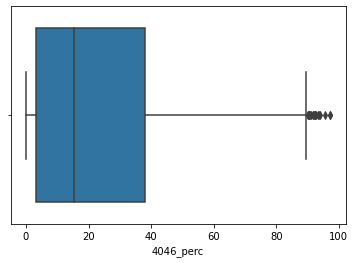

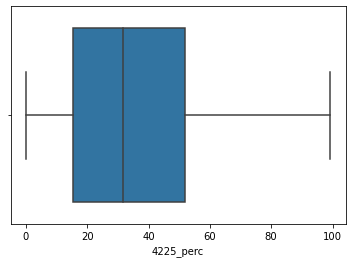

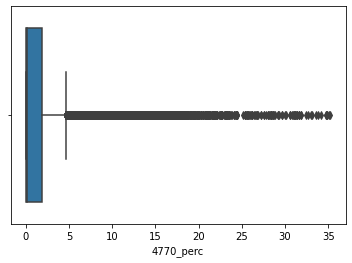

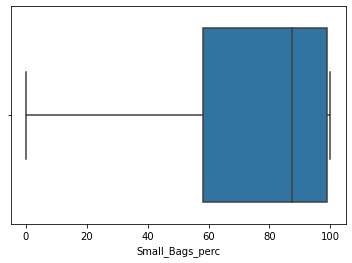

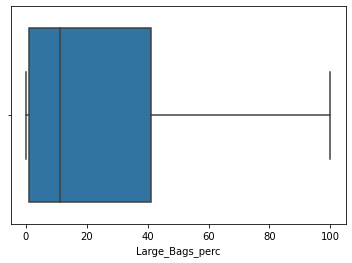

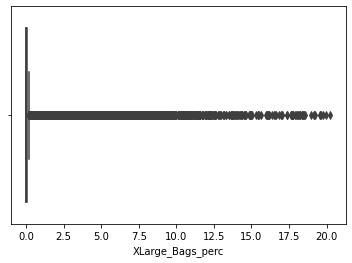

In [141]:
#Using box plot
for column in ["4046_perc","4225_perc","4770_perc","Small_Bags_perc","Large_Bags_perc","XLarge_Bags_perc"]:
    plt.figure()
    sns.boxplot(df_without_outlier[column],width=0.8)
    plt.plot()

XLarge_Bags_perc & 4770_perc data is skewed

In [142]:
df_without_outlier.describe()

,Date,AveragePrice,Total Volume,Total Bags,year,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
count,18014.000000,18014.000000,1.801400e+04,1.801400e+04,18014.000000,18014.000000,18014.000000,18014.000000,17999.000000,17999.000000,...,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000
mean,736189.927723,1.409550,5.442465e+05,1.563342e+05,2016.147607,22.413067,34.742968,1.837246,75.012914,24.333269,...,0.018763,0.018763,0.018763,0.018763,0.018763,0.018763,0.009382,0.018763,0.018486,0.506217
std,341.419805,0.403169,1.221710e+06,3.660827e+05,0.939357,21.457989,23.624497,3.925983,28.661367,28.703319,...,0.135691,0.135691,0.135691,0.135691,0.135691,0.135691,0.096406,0.135691,0.134703,0.499975
min,735602.000000,0.440000,8.456000e+01,0.000000e+00,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,735896.000000,1.100000,1.065966e+04,4.959685e+03,2015.000000,3.238851,15.503492,0.000000,58.046691,0.897160,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,736190.000000,1.380000,1.030348e+05,3.851821e+04,2016.000000,15.449088,31.530021,0.141105,87.567614,11.361351,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,736484.000000,1.670000,4.167509e+05,1.077150e+05,2017.000000,37.941305,52.026685,1.847884,98.788879,41.031205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,736778.000000,3.250000,1.127475e+07,4.145407e+06,2018.000000,97.252342,99.262785,35.239559,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
df.shape

(18249, 65)

In [144]:
df_without_outlier.shape

(18014, 65)

In [145]:
df_without_outlier.head()

,Date,AveragePrice,Total Volume,Total Bags,year,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
0,735959,1.33,64236.62,8696.87,2015,1.613939,84.772284,0.074973,98.927775,1.072225,...,0,0,0,0,0,0,0,0,0,0
1,735952,1.35,54876.98,9505.56,2015,1.228712,81.343416,0.106292,98.974390,1.025610,...,0,0,0,0,0,0,0,0,0,0
2,735945,0.93,118220.22,8145.35,2015,0.672220,92.327412,0.110387,98.733756,1.266244,...,0,0,0,0,0,0,0,0,0,0
3,735938,1.08,78992.15,5811.16,2015,1.433054,91.118434,0.091883,97.698222,2.301778,...,0,0,0,0,0,0,0,0,0,0
4,735931,1.28,51039.60,6183.95,2015,1.844607,85.890936,0.148473,96.803176,3.196824,...,0,0,0,0,0,0,0,0,0,0


#### Checking corelation between columns

In [147]:
df_without_outlier.corr()

,Date,AveragePrice,Total Volume,Total Bags,year,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
Date,1.000000,0.143701,0.018518,0.116434,0.950244,-0.168006,-0.210891,-0.184334,-0.040288,0.035087,...,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000021,0.000029,-0.000055,0.000610
AveragePrice,0.143701,1.000000,-0.342540,-0.302081,0.091298,-0.338980,0.156434,-0.125056,0.117212,-0.106426,...,-0.105749,-0.003956,0.012362,0.007227,0.037996,-0.000242,0.032945,-0.047104,-0.049671,0.614069
Total Volume,0.018518,-0.342540,1.000000,0.922445,0.032811,0.236200,0.002261,0.089058,0.047179,-0.056466,...,0.277057,0.144429,-0.056391,-0.050863,-0.057939,-0.039500,0.033721,0.302341,-0.012668,-0.411430
Total Bags,0.116434,-0.302081,0.922445,1.000000,0.128458,0.170620,-0.044678,0.052847,0.014291,-0.022590,...,0.201783,0.143819,-0.052065,-0.042586,-0.054369,-0.037265,0.092787,0.351183,-0.019048,-0.363732
year,0.950244,0.091298,0.032811,0.128458,1.000000,-0.156196,-0.208140,-0.176773,-0.042876,0.037963,...,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000033,0.000047,-0.000067,0.000705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
region_Tampa,0.000029,-0.000242,-0.039500,-0.037265,0.000047,0.096576,-0.146352,-0.063723,-0.012928,0.012573,...,-0.019122,-0.019122,-0.019122,-0.019122,-0.019122,1.000000,-0.013457,-0.019122,-0.018977,-0.001720
region_TotalUS,0.000021,0.032945,0.033721,0.092787,0.000033,-0.024421,-0.004356,-0.029726,-0.022199,0.024375,...,-0.013457,-0.013457,-0.013457,-0.013457,-0.013457,-0.013457,1.000000,-0.013457,-0.013355,0.096114
region_West,0.000029,-0.047104,0.302341,0.351183,0.000047,0.047143,-0.032829,-0.028476,-0.118967,0.121403,...,-0.019122,-0.019122,-0.019122,-0.019122,-0.019122,-0.019122,-0.013457,1.000000,-0.018977,-0.001720
region_WestTexNewMexico,-0.000055,-0.049671,-0.012668,-0.019048,-0.000067,0.107266,-0.064494,-0.014885,-0.002997,0.004116,...,-0.018977,-0.018977,-0.018977,-0.018977,-0.018977,-0.018977,-0.013355,-0.018977,1.000000,-0.002943


<AxesSubplot:>

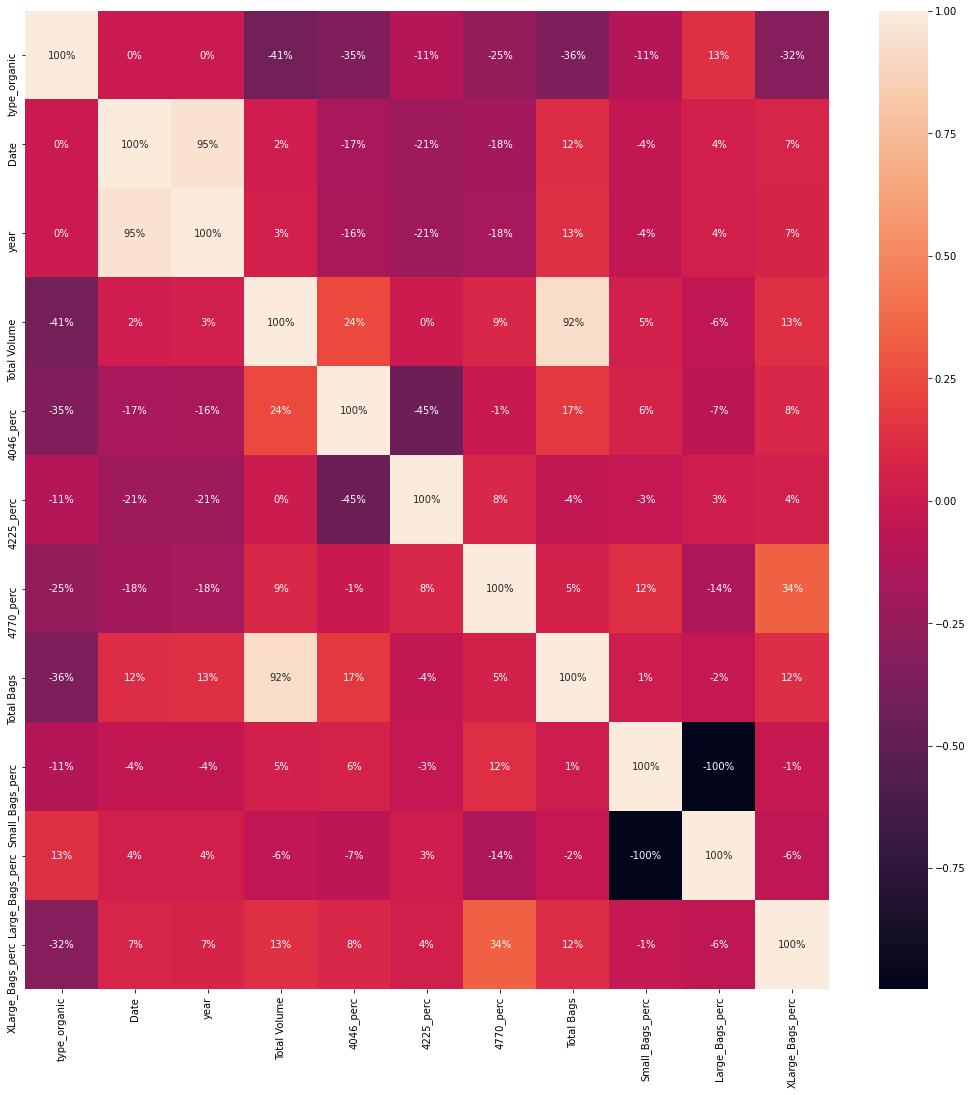

In [158]:
#checking for correlation using heatmap
plt.figure(figsize=(18,18))
sns.heatmap(df_without_outlier[["type_organic","Date","year","Total Volume","4046_perc","4225_perc","4770_perc","Total Bags","Small_Bags_perc","Large_Bags_perc","XLarge_Bags_perc"]].corr(),annot=True,fmt='0.0%')


There is a strong co-relation between ( Total Volume & Total Bags), (year & Date), (Large_Bags_perc & Small_Bags_perc). Also, data in total bags and total volume are redundant data. Data in Date and year is redundant. So dropping the columns, Total Volume , Total Bags and year

In [159]:
df_without_outlier =df_without_outlier.drop(df_without_outlier[["Total Volume","Total Bags","year"]],axis=1)

In [160]:
df_without_outlier.head()

,Date,AveragePrice,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,XLarge_Bags_perc,region_Atlanta,region_BaltimoreWashington,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
0,735959,1.33,1.613939,84.772284,0.074973,98.927775,1.072225,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,735952,1.35,1.228712,81.343416,0.106292,98.974390,1.025610,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,735945,0.93,0.672220,92.327412,0.110387,98.733756,1.266244,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,735938,1.08,1.433054,91.118434,0.091883,97.698222,2.301778,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,735931,1.28,1.844607,85.890936,0.148473,96.803176,3.196824,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
df_without_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 18248
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        18014 non-null  int64  
 1   AveragePrice                18014 non-null  float64
 2   4046_perc                   18014 non-null  float64
 3   4225_perc                   18014 non-null  float64
 4   4770_perc                   18014 non-null  float64
 5   Small_Bags_perc             17999 non-null  float64
 6   Large_Bags_perc             17999 non-null  float64
 7   XLarge_Bags_perc            17999 non-null  float64
 8   region_Atlanta              18014 non-null  uint8  
 9   region_BaltimoreWashington  18014 non-null  uint8  
 10  region_Boise                18014 non-null  uint8  
 11  region_Boston               18014 non-null  uint8  
 12  region_BuffaloRochester     18014 non-null  uint8  
 13  region_California           180

There are some missing values in Small/Large and XLarge bags after the data processing. replacing the null values with median values.

In [165]:
df_without_outlier.Small_Bags_perc.fillna(df_without_outlier.Small_Bags_perc.median(),inplace=True)
df_without_outlier.Large_Bags_perc.fillna(df_without_outlier.Large_Bags_perc.median(),inplace=True)
df_without_outlier.XLarge_Bags_perc.fillna(df_without_outlier.XLarge_Bags_perc.median(),inplace=True)
df_without_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 18248
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        18014 non-null  int64  
 1   AveragePrice                18014 non-null  float64
 2   4046_perc                   18014 non-null  float64
 3   4225_perc                   18014 non-null  float64
 4   4770_perc                   18014 non-null  float64
 5   Small_Bags_perc             18014 non-null  float64
 6   Large_Bags_perc             18014 non-null  float64
 7   XLarge_Bags_perc            18014 non-null  float64
 8   region_Atlanta              18014 non-null  uint8  
 9   region_BaltimoreWashington  18014 non-null  uint8  
 10  region_Boise                18014 non-null  uint8  
 11  region_Boston               18014 non-null  uint8  
 12  region_BuffaloRochester     18014 non-null  uint8  
 13  region_California           180

There is no any missing value in dataset

#### Data distribution of AveragePrice, Date, type_organic and the different size bags and varieties :

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

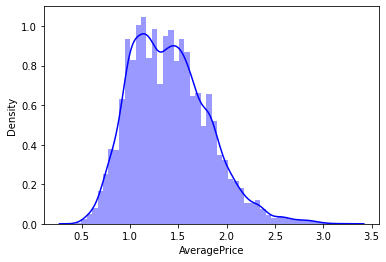

In [167]:
sns.distplot(df.AveragePrice,color='b')

<AxesSubplot:xlabel='Date', ylabel='Density'>

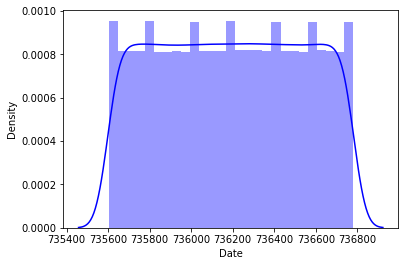

In [175]:
sns.distplot(df_without_outlier.Date,color='b')

<AxesSubplot:xlabel='type_organic', ylabel='Density'>

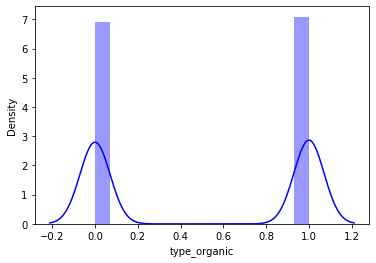

In [176]:
sns.distplot(df_without_outlier.type_organic,color='b')

<AxesSubplot:xlabel='4046_perc', ylabel='Density'>

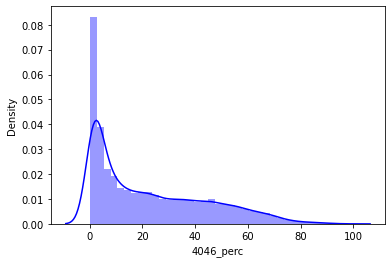

In [178]:
sns.distplot(df_without_outlier["4046_perc"],color='b')

<AxesSubplot:xlabel='4225_perc', ylabel='Density'>

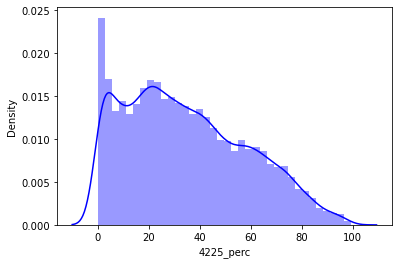

In [179]:
sns.distplot(df_without_outlier["4225_perc"],color='b')

<AxesSubplot:xlabel='4770_perc', ylabel='Density'>

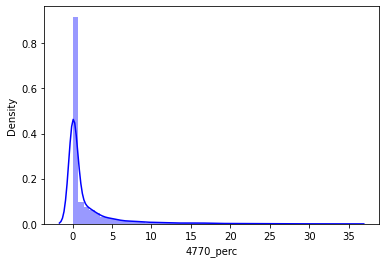

In [180]:
sns.distplot(df_without_outlier["4770_perc"],color='b')

<AxesSubplot:xlabel='Small_Bags_perc', ylabel='Density'>

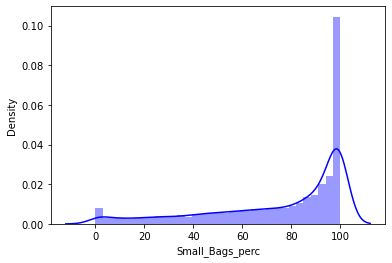

In [182]:
sns.distplot(df_without_outlier["Small_Bags_perc"],color='b')

<AxesSubplot:xlabel='Large_Bags_perc', ylabel='Density'>

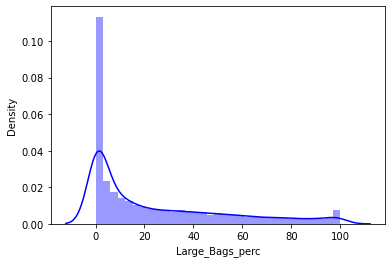

In [183]:
sns.distplot(df_without_outlier["Large_Bags_perc"],color='b')

<AxesSubplot:xlabel='XLarge_Bags_perc', ylabel='Density'>

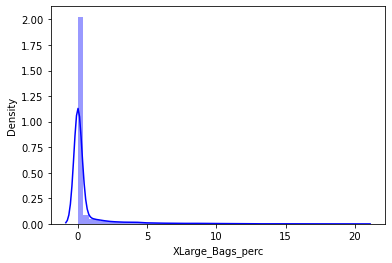

In [184]:
sns.distplot(df_without_outlier["XLarge_Bags_perc"],color='b')

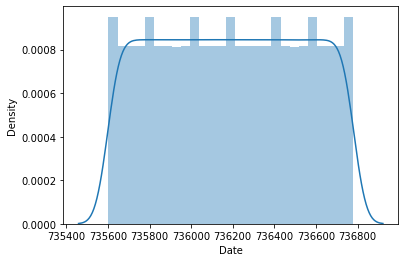

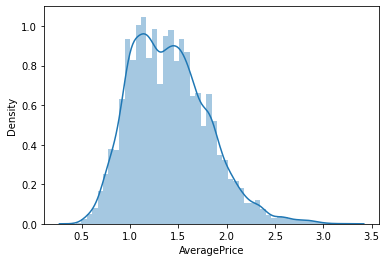

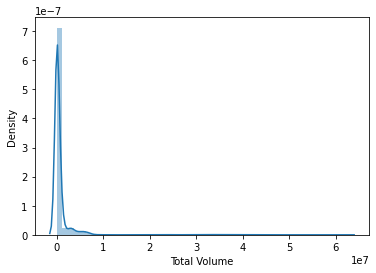

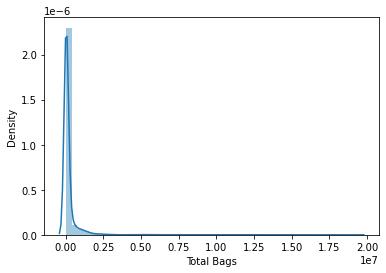

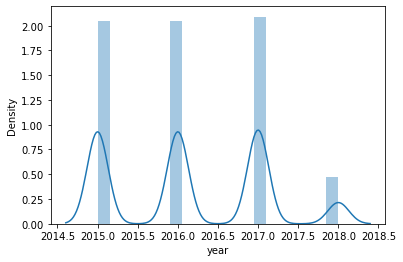

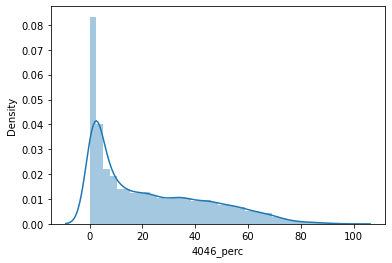

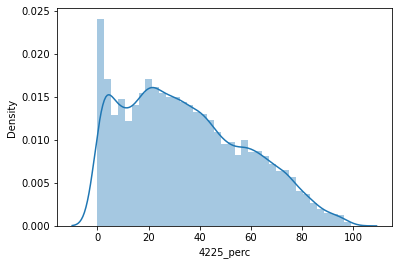

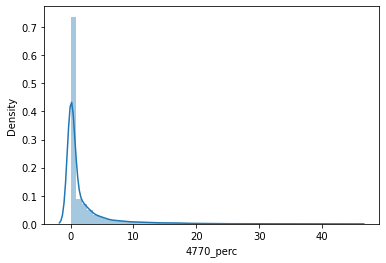

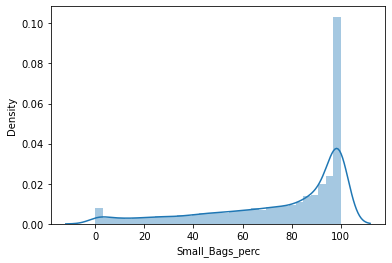

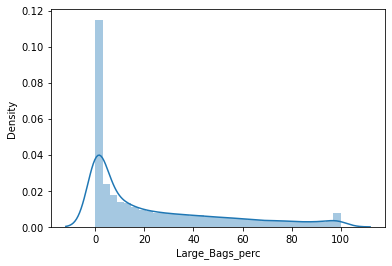

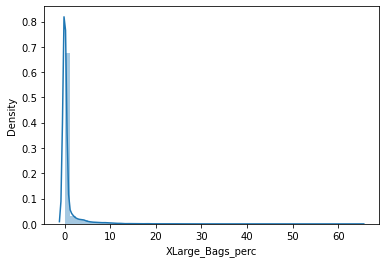

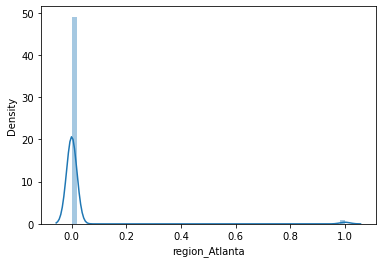

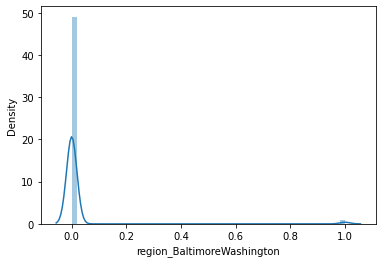

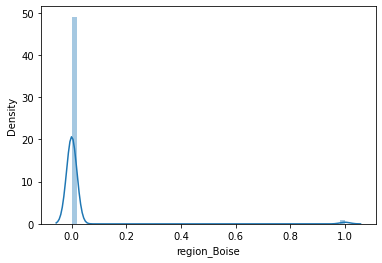

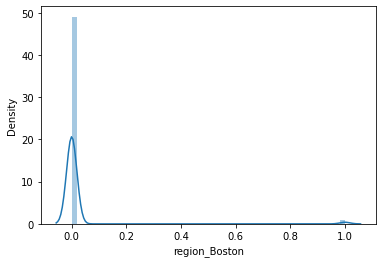

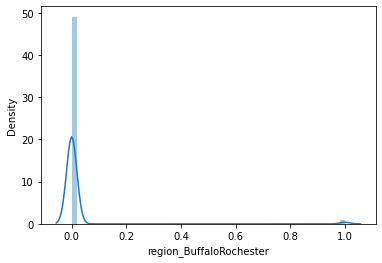

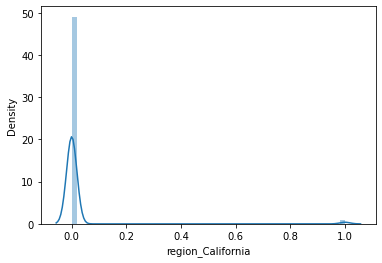

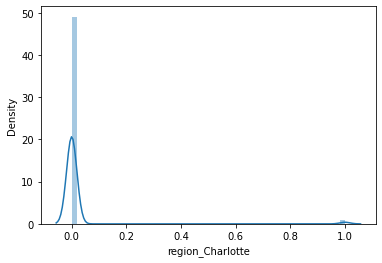

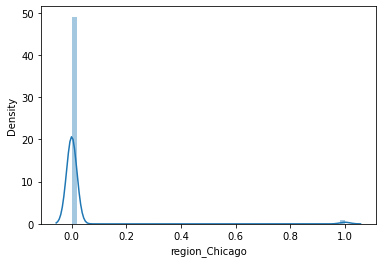

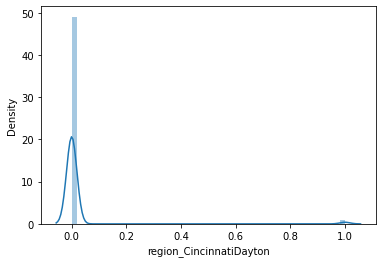

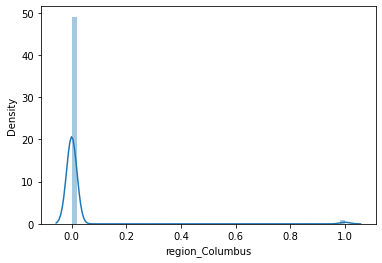

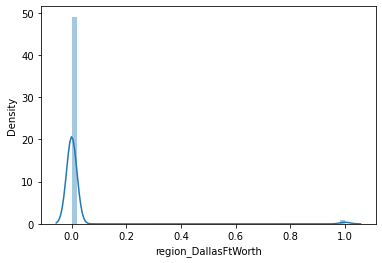

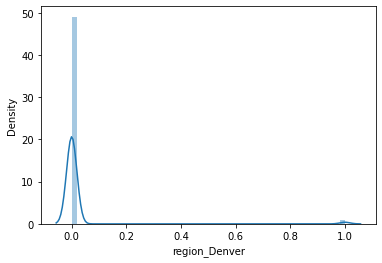

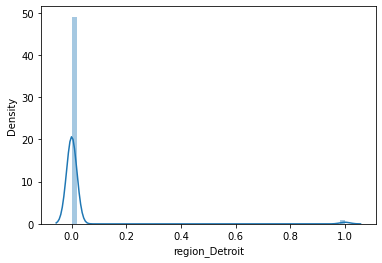

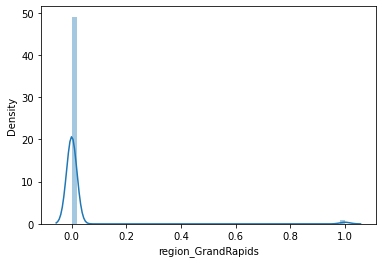

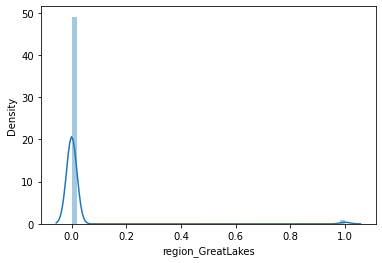

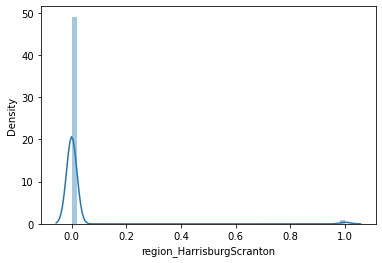

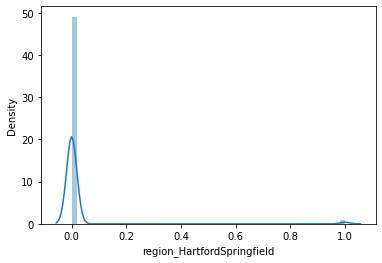

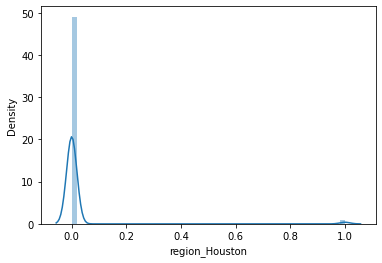

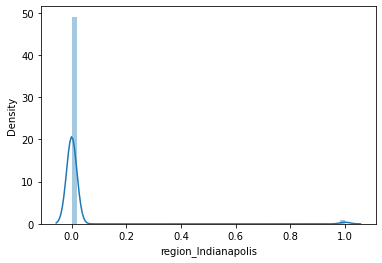

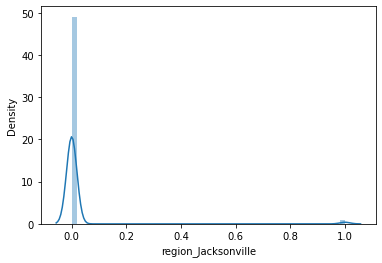

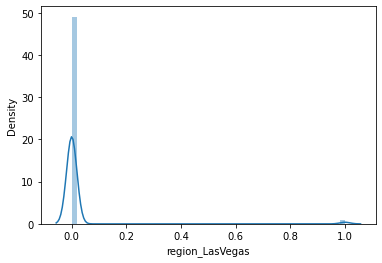

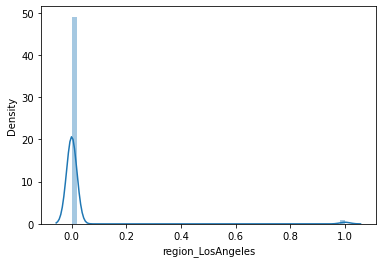

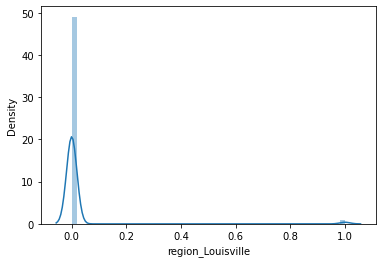

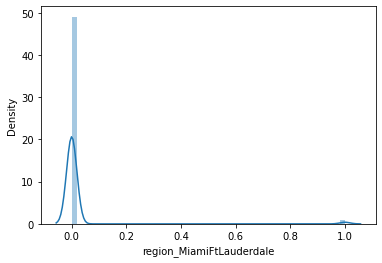

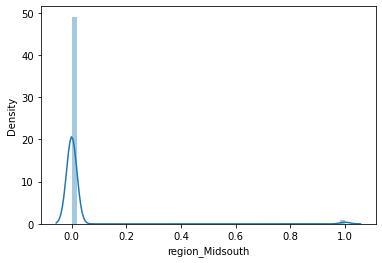

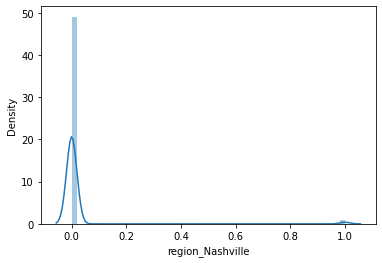

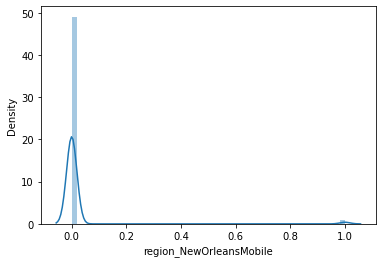

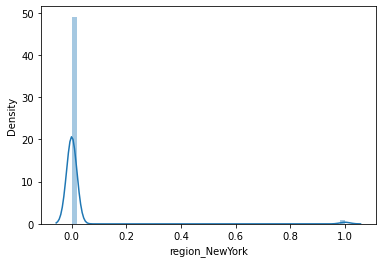

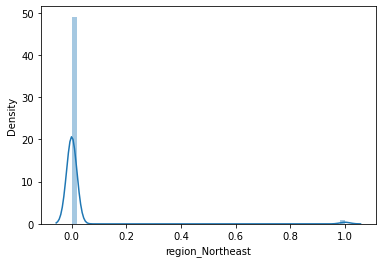

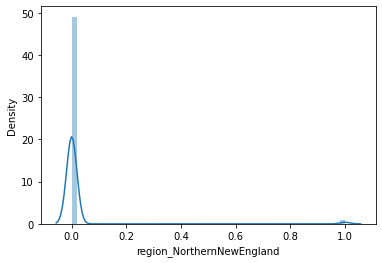

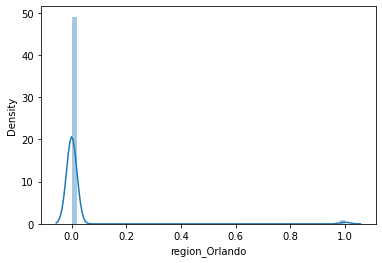

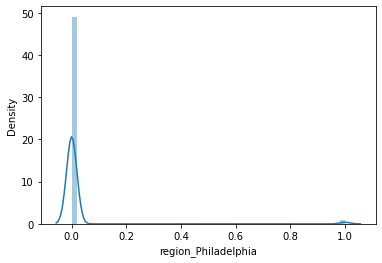

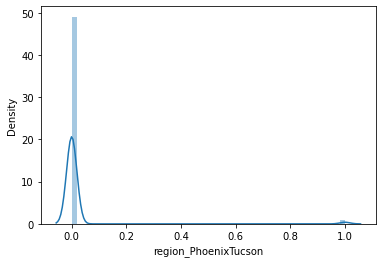

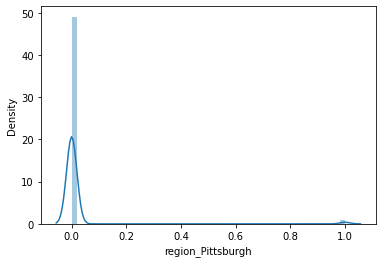

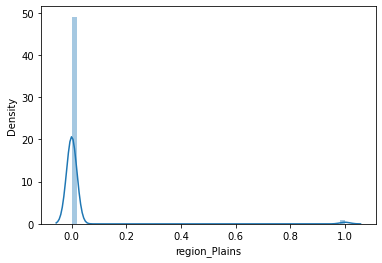

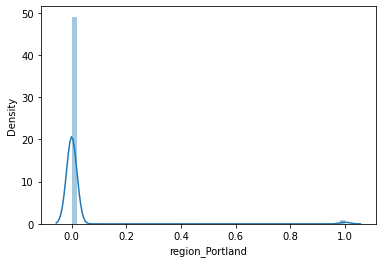

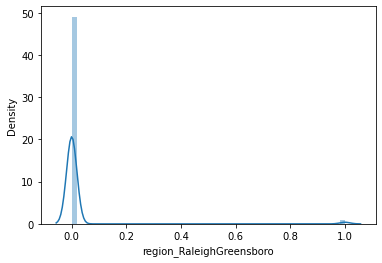

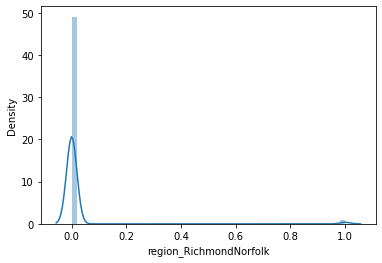

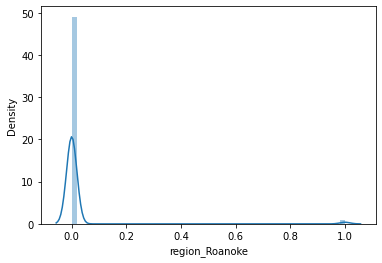

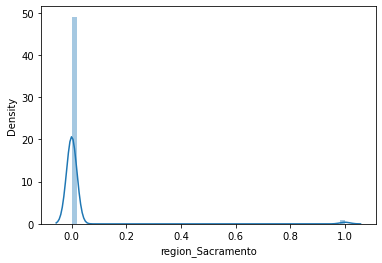

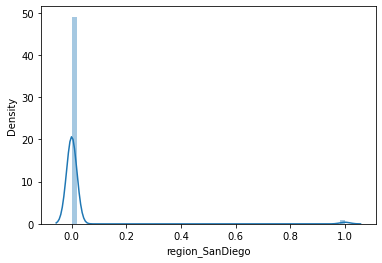

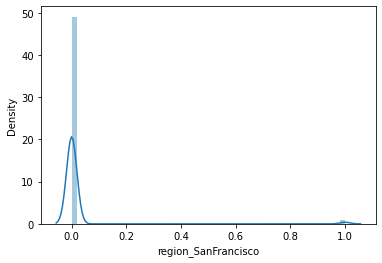

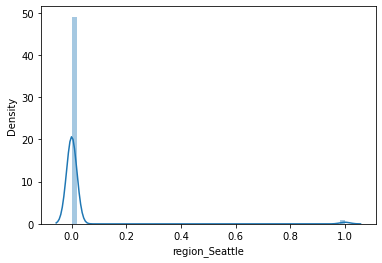

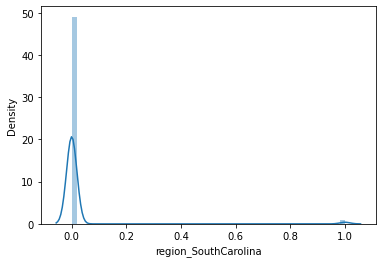

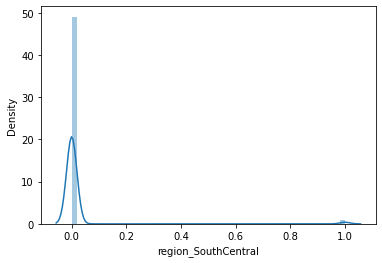

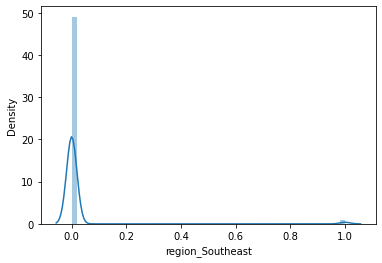

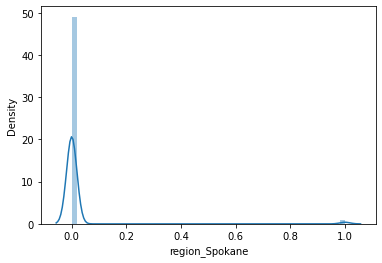

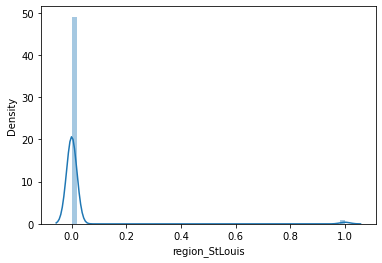

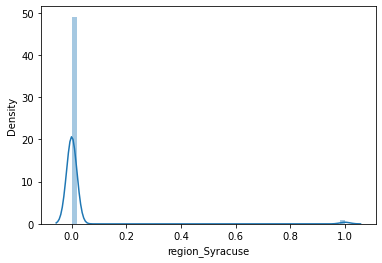

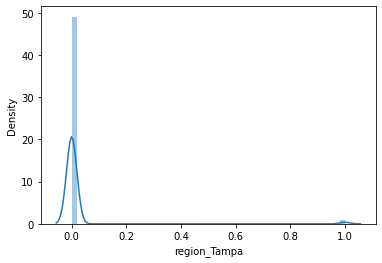

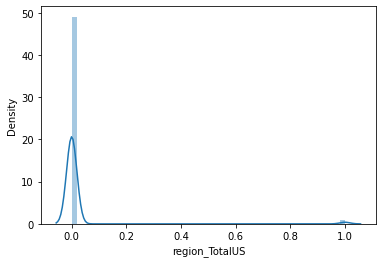

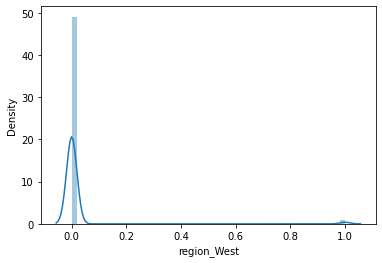

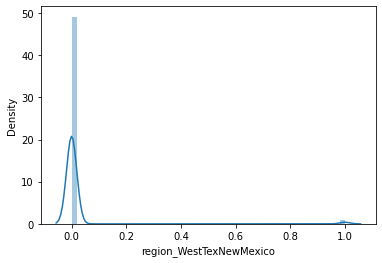

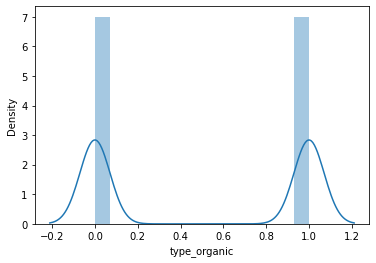

In [220]:
# Distribution of data
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

All are Normally distributed..

#### Visualising Pairwise correlation

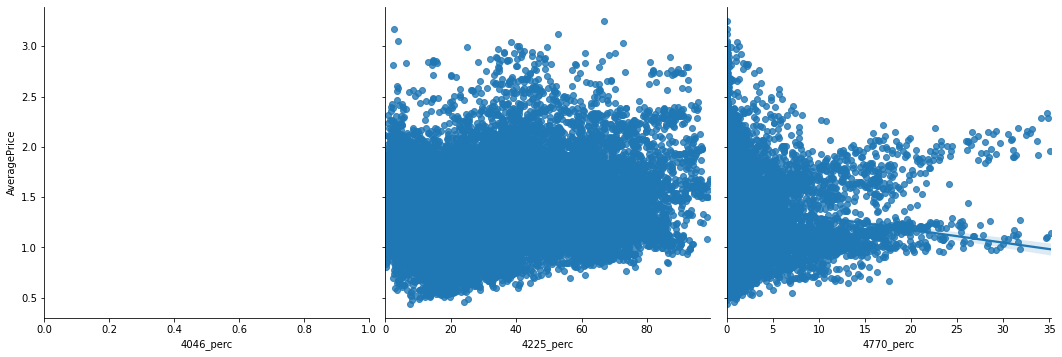

In [188]:
sns.pairplot(df_without_outlier, x_vars=["4046_perc","4225_perc","4770_perc"], y_vars='AveragePrice', height=5, aspect=1, kind='reg')

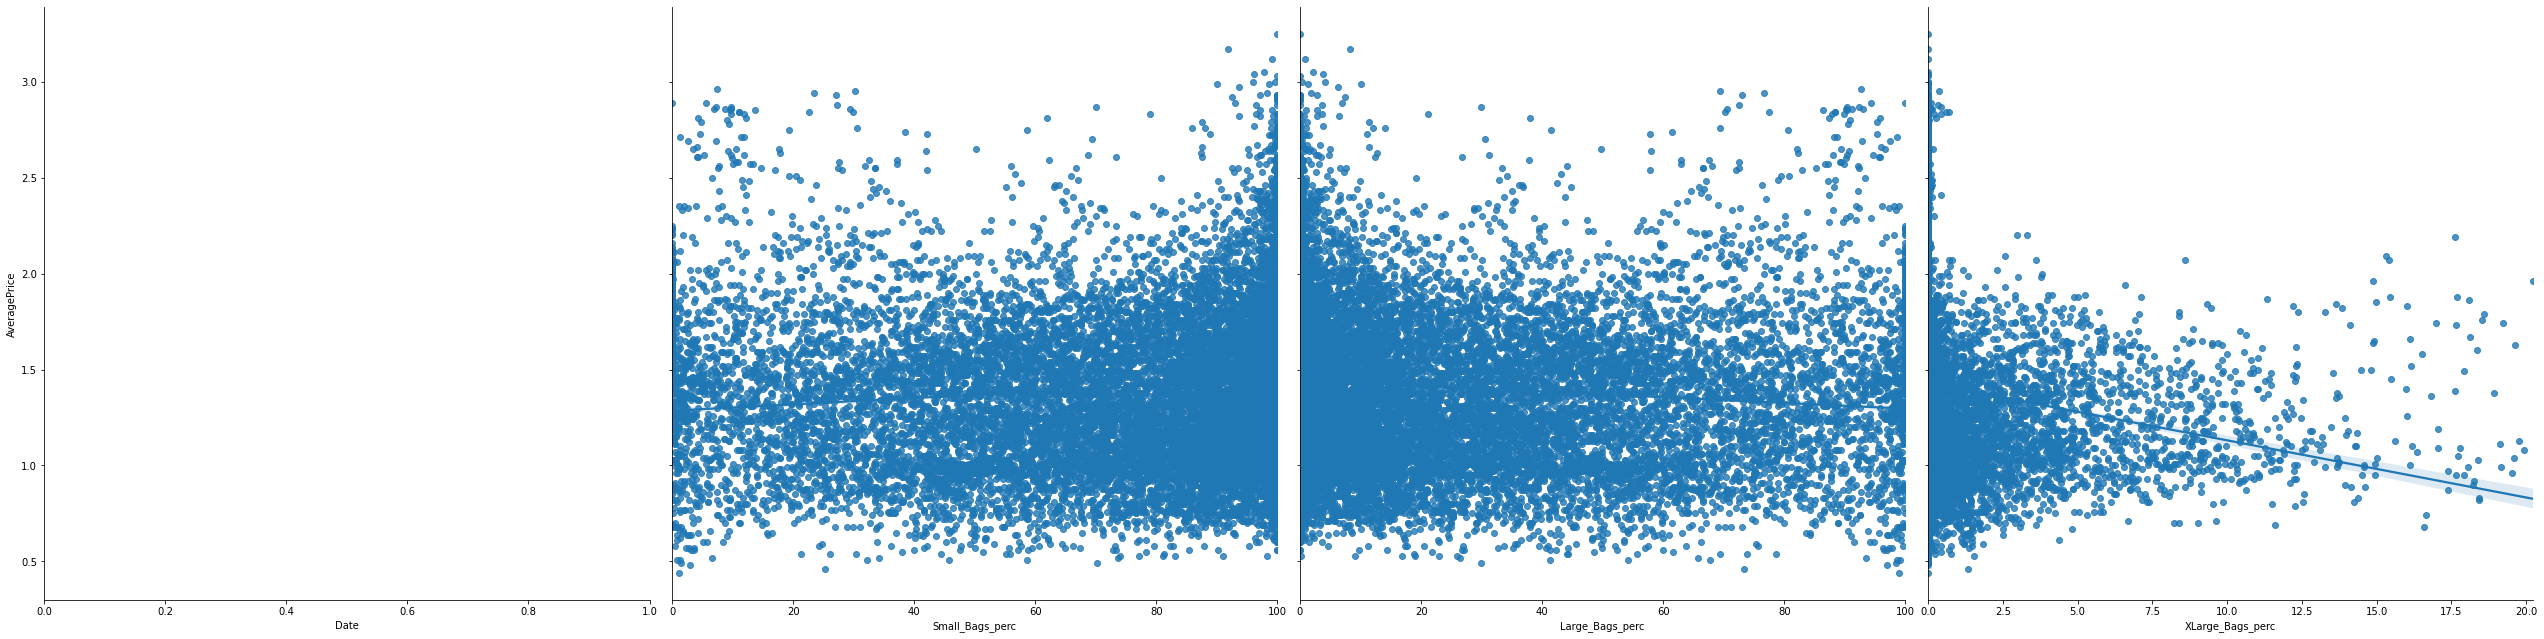

In [189]:
sns.pairplot(df_without_outlier, x_vars=["Date","Small_Bags_perc","Large_Bags_perc","XLarge_Bags_perc"], y_vars='AveragePrice', height=9, aspect=1, kind='reg')

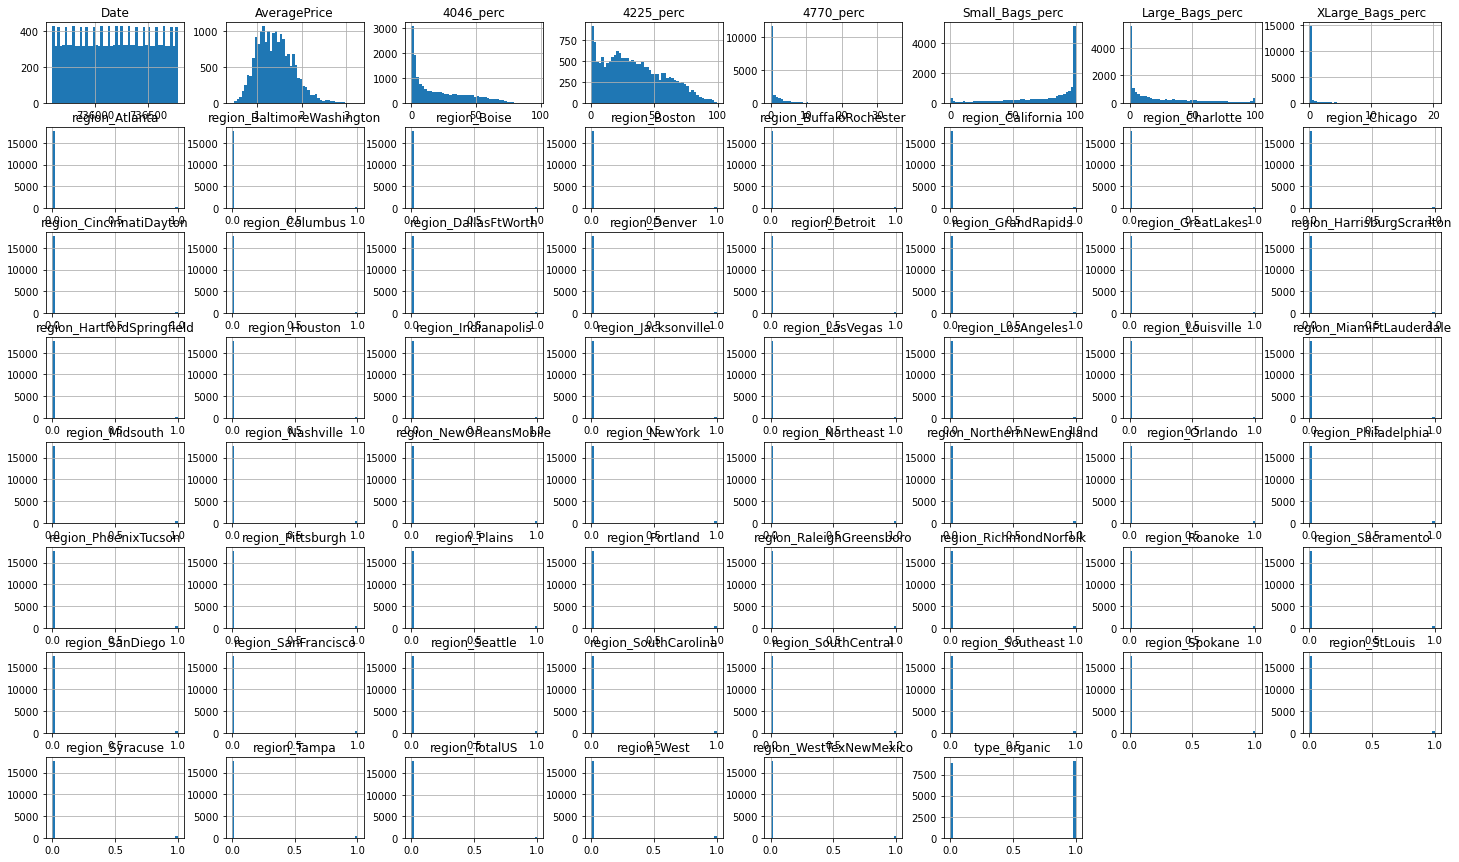

In [206]:
df_without_outlier.hist(bins=50, figsize=(25,15))
plt.show()

### Building the Model

In [207]:
x = df_without_outlier.drop(["AveragePrice"],axis=1)
x.shape

(18014, 61)

In [209]:
y = df_without_outlier["AveragePrice"]
y.shape

(18014,)

### Splitting x and y into training and test datasets.

In [213]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=200)

In [214]:
from sklearn.model_selection import train_test_split
print("Train case below")
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("\nTest case below")
print("x_test shape:",x_test.shape)
print("y_test shape:", y_test.shape)

Train case below
x_train shape: (12609, 61)
y_train shape: (12609,)

Test case below
x_test shape: (5405, 61)
y_test shape: (5405,)


#### Linear regression 

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)
pred =lr.predict(x_test)

#### Finding best random state

In [227]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"Best random state :{i} and Train r2 score :{r2_score(y_train,pred_train)}")
    print(f"Best random state :{i} and Test r2 score :{r2_score(y_test,pred_test)}")
    print("")

Best random state :1 and Train r2 score :0.628977501795944
Best random state :1 and Test r2 score :0.6329322079801919

Best random state :2 and Train r2 score :0.6350384005996085
Best random state :2 and Test r2 score :0.6191954152425951

Best random state :3 and Train r2 score :0.6347866127743114
Best random state :3 and Test r2 score :0.6198234794020938

Best random state :4 and Train r2 score :0.6319004031404525
Best random state :4 and Test r2 score :0.6266306970293924

Best random state :5 and Train r2 score :0.6296798941117996
Best random state :5 and Test r2 score :0.6311414209427165

Best random state :6 and Train r2 score :0.6280728874945336
Best random state :6 and Test r2 score :0.6352997293412126

Best random state :7 and Train r2 score :0.637341832829436
Best random state :7 and Test r2 score :0.6129123909255583

Best random state :8 and Train r2 score :0.6307659687304431
Best random state :8 and Test r2 score :0.6279141470283216

Best random state :9 and Train r2 score :0

Best random state :175 and Train r2 score :0.6319198330382431

Best random state :175 and Test r2 score :0.6264284012760806

In [241]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=175)

In [242]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred =lr.predict(x_test)

In [243]:
# Performance of the model

def performance(actual,pred):
    print("mean_squared_error:", mean_squared_error(y_test,pred))
    print("mean_absolute_error:",mean_absolute_error(y_test,pred))
    print("root_mean_squared_error:",np.sqrt(mean_squared_error(y_test,pred)))
    print("R2 Score:",r2_score(y_test,pred))
    print("\n")

In [244]:
performance(y_test,pred)

mean_squared_error: 0.06174683786161117
mean_absolute_error: 0.18734721759450704
root_mean_squared_error: 0.2484891101469261
R2 Score: 0.6264284012760806




In [276]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)
score = model.score(x_train, y_train)
print('Training Score:', score)
score = model.score(x_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':pred})

Training Score: 0.9555066729102895
Testing Score: 0.895559373487431


#### cross Validation

In [245]:
from sklearn.model_selection import cross_val_score

In [246]:
cross_ls = cross_val_score(LinearRegression(),x,y,cv=10)
cross_ls.mean()

0.29050143399457934

#### Regularation Process

In [247]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [251]:
# Lasso
le = Lasso(alpha=0.0001)
le.fit(x_train,y_train)
pred = le.predict(x_test)
le.score(x_train,y_train)

print(r2_score(y_test,pred))

0.6246809498268185


#### Cross Validation

In [252]:
cross_le = cross_val_score(le,x,y,cv=10)
cross_le.mean()

0.2944683112678237

In [255]:
# Ridge model
rg = Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred = rg.predict(x_test)
rg.score(x_train,y_train)

print(r2_score(y_test,pred))

0.6264283811936362


#### Cross Validation


In [256]:
cross_rg = cross_val_score(le,x,y,cv=10)
cross_rg.mean()

0.2944683112678237

In [258]:
# ElasticNet
ei = ElasticNet(alpha=0.0001)
ei.fit(x_train,y_train)
ei.score(x_train,y_train)



0.6311842628589208

#### Cross Validation

In [259]:
cross_ei = cross_val_score(le,x,y,cv=10)
cross_ei.mean()

0.2944683112678237

#### Hyper Parameter Tuning

In [260]:
from sklearn.model_selection import GridSearchCV

In [264]:
# Lasso Regression param
param = {'alpha':[.1,0.01,0.001,0.0001],
        'selection':['cyclic','random']}

In [265]:
lasso_hp = GridSearchCV(Lasso(),param,cv=5)
lasso_hp.fit(x_train,y_train)
lasso_hp.best_params_

{'alpha': 0.0001, 'selection': 'cyclic'}

In [266]:
# Taken alpha value in Lasso
le = Lasso(alpha=0.0001,selection='cyclic')
le.fit(x_train,y_train)
pred = le.predict(x_test)
le.score(x_train,y_train)

print(r2_score(y_test,pred))

0.6246809498268185


In [267]:
# Ridge Regression param
param_r = {'alpha':[0.1,0.01,0.001,0.0001],
          'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}

In [269]:
ridge_hp = GridSearchCV(Ridge(),param_r,cv=5)
ridge_hp.fit(x_train,y_train)
ridge_hp.best_params_

{'alpha': 0.01, 'solver': 'svd'}

In [271]:
#Taken alpha value it will be corrected
rg = Ridge(alpha=0.01,solver='svd')
rg.fit(x_train,y_train)
pred = rg.predict(x_test)


print(r2_score(y_test,pred))

0.6264263809414043


Ridge Regrssion model is giving higher accuracy so we are selecting this model.

#### Saving Model

In [273]:
import joblib

In [274]:
joblib.dump(rg,"Avacado_prediction.obj")

['Avacado_prediction.obj']